In [1]:
import pandas as pd
from datetime import datetime



In [2]:
import pandas as pd
import re

def is_meaningful(text, min_len=5, max_space_ratio=0.7):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return False
    cleaned = re.sub(r"\s+", " ", text.strip())  # 여러 공백을 하나로 축소
    total_len = len(cleaned)
    space_count = cleaned.count(" ")
    
    # 공백 비율과 최소 길이로 필터링
    space_ratio = space_count / total_len if total_len > 0 else 1.0
    return total_len >= min_len and space_ratio <= max_space_ratio




In [22]:
def preprocessing(df):

    df["content"] = df["content"].fillna("").astype(str)
    df = df[df["content"].apply(is_meaningful)].copy()
    df["content"] = df["content"].str.strip().replace(r"\s+"," ",regex=True)
    return df

In [8]:
import os
data_dir = r'C:\Users\main\Documents\Shop\data\review'
data_li = [os.path.join(data_dir, fname) 
           for fname in os.listdir(data_dir) if fname.endswith('.csv')]
data_li

['C:\\Users\\main\\Documents\\Shop\\data\\review\\9 Kings 나인 킹즈_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\Apex 레전드™_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\Core Keeper_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\Counter-Strike 2_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\Dead by Daylight_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\DJMAX RESPECT V_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\ELDEN RING 밤의 통치자_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\Euro Truck Simulator 2_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\F1® 25_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\HELLDIVERS™ 2_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\PEAK_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\PUMP IT UP RISE_reviews.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\review\\R.E.P.O._revi

In [6]:
def safe_filename(name):
    """파일 이름에 쓸 수 없는 문자 제거"""
    return re.sub(r'[\\/:*?"<>|\s]', '_', name)


In [9]:
import os
for idx in range(len(data_li)):
    path = data_li[idx]
    df = pd.read_csv(path,encoding = "utf-8")
    df = preprocessing(df)
    
    name = os.path.basename(path).replace('_reivews.csv','')
    name = safe_filename(name)
    
    df.to_csv(f"fixed_{name}_reviews.csv",encoding="utf-8",index=False)

In [45]:
import os

data_dir = r'C:\Users\main\Documents\Shop\data'
data_li = [os.path.join(data_dir, fname) 
           for fname in os.listdir(data_dir) if fname.endswith('.csv')]


data_li


['C:\\Users\\main\\Documents\\Shop\\data\\Apex_레전드™_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\Core Keeper_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\Core_Keeper_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\Counter-Strike_2_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\dead Space3_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\eFootball2024_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\ELDEN RING 밤의 통치자_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\FlatOut 3_ Chaos & Destruction_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\garry_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\garry_mod.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\NBA_2K24_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\overwatch2_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\Palworld_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\PEAK_info.csv',
 'C:\\Users\\main\\Documents\\Shop\\data\\portal_info.csv',
 'C:\\Users\\main\\Document

In [55]:
from chromadb.config import Settings

In [3]:
from gensim.models.fasttext import load_facebook_model

ft = load_facebook_model("../shop/admservice/Model/cc.ko.300.bin")    

In [ ]:
import re, emoji
from soynlp.normalizer import repeat_normalize

def cleaner(text):
    text = emoji.replace_emoji(text, replace='')          # 이모지 제거
    text = re.sub(r'https?://\S+', '', text)              # URL 제거
    text = re.sub(r'[^가-힣0-9a-zA-Z\s]', ' ', text)      # 특수문자 정리
    text = repeat_normalize(text, num_repeats=2)          # ㅋㅋㅋㅋ → ㅋㅋ
    return text.strip()

In [12]:
txt = clean("안녕    메켙친     : //  ㅋㅋㅋㅋㅋㅁㅁㅁㅁㅁ ")

txt

'안녕 메켙친'

In [ ]:
from konlpy.tag import Okt


def tokenizer():
    pass

In [ ]:
def sentence2vector():
    

In [27]:
import os
data_dir1 = r'C:\Shop\preprocessor'

data_li1 = [os.path.join(data_dir1, fname) for fname in os.listdir(data_dir1) if fname.endswith('.csv')]


data_li1

MAX_LEN = 200

# 4. 각 파일 처리
for file_path in data_li1:
    df = pd.read_csv(file_path)


    if 'content' not in df.columns:
        continue

    df = df[df['content'].astype(str).str.len() < MAX_LEN]

    df.to_csv(os.path.basename(file_path),index=False,encoding="utf-8-sig")

    print('save success')

save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success


In [43]:

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="alsgyu/sentiment-analysis-fine-tuned-model",
    tokenizer="beomi/KcBERT-base"
)

print(sentiment_pipeline("개재미없다"))

Device set to use cpu


[{'label': 'LABEL_0', 'score': 0.5712548494338989}]


In [47]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tempfile
from django.core.files.base import ContentFile
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="alsgyu/sentiment-analysis-fine-tuned-model",
    tokenizer="beomi/KcBERT-base"
)
def classify_review(text: str) -> str:
    result = sentiment_pipeline(text[:512])[0]
    label = result['label'].lower()
    
    if '2' in label:
        return '긍정'
    elif '1' in label:
        return '애매'
    elif '0' in label:
        return '부정'
    
    
sentiment_pipeline("아주 정말정말 재미 있음 강력추천")

Device set to use cpu


[{'label': 'LABEL_2', 'score': 0.9919123649597168}]

In [48]:
r1 = ["시간낭비가 컨텐츤데 돈쓰면 시간낭비를 못함","계정을 한번 잃어버리면 찾을방도가 없음;","재미있음","그래픽은 이미 무료를 뛰어넘었고 적당한 노가다가 있는 게임이다. 이겜은 팀포만큼 재밌다"
      ,"게임이 점점 발전하는 게 느껴진다 가볍게 플레이하기 좋은 게임","최고의 그래픽 컨텐츠 모두 완벽합니다"]

sample_sentiments = [classify_review(text) for text in r1]

sample_sentiments

['부정', '부정', '긍정', '긍정', '긍정', '긍정']

In [12]:
korean_stopwords = [
    '정말', '그냥', '너무', '진짜', '그리고', '이건', '이것', '그건', '거의', '좀', '합니다', '있는', '없는', '했다', '하는',
    '게임', '입니다', '했다', '있다', '였다', '나는', '제가', '것이다'
]



def extract_top_keywords_by_sentiment(reviews, sentiments, top_n=10):
    grouped = {'긍정': [], '부정': []}
    for r, s in zip(reviews, sentiments):
        if s in grouped:
            grouped[s].append(r)

    tfidf = TfidfVectorizer(max_features=1000, stop_words=korean_stopwords)
    keywords = {}
    for sentiment, texts in grouped.items():
        if not texts:
            keywords[sentiment] = []
            continue
        X = tfidf.fit_transform(texts)
        scores = np.asarray(X.sum(axis=0)).ravel()
        indices = scores.argsort()[::-1][:top_n]
        feature_names = np.array(tfidf.get_feature_names_out())
        top_words = feature_names[indices]
        scores_sorted = scores[indices]
        keywords[sentiment] = [f"{word} ({round(score, 2)})" for word, score in zip(top_words, scores_sorted)]

    return keywords

In [13]:
r1 = ["시간낭비가 컨텐츤데 돈쓰면 시간낭비를 못함","계정을 한번 잃어버리면 찾을방도가 없음;"]

sample_sentiments = [classify_review(text) for text in r1]

top_keywords = extract_top_keywords_by_sentiment(r1, sample_sentiments)

print("▶ 긍정 키워드:", top_keywords.get("긍정", []))
print("▶ 부정 키워드:", top_keywords.get("부정", []))

▶ 긍정 키워드: []
▶ 부정 키워드: []


In [55]:
import matplotlib.pyplot as plt

def visualize_top_keywords(top_keywords):
    for sentiment, keywords in top_keywords.items():
        if not keywords:
            continue

        words, scores = zip(*[
            (kw.split(" ")[0], float(kw.split("(")[-1].rstrip(")")))
            for kw in keywords
        ])

        plt.figure(figsize=(10, 4))
        plt.bar(words, scores, color='green' if sentiment == '긍정' else 'red')
        plt.title(f"{sentiment} 키워드 TF-IDF 점수")
        plt.xlabel("키워드")
        plt.ylabel("점수")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


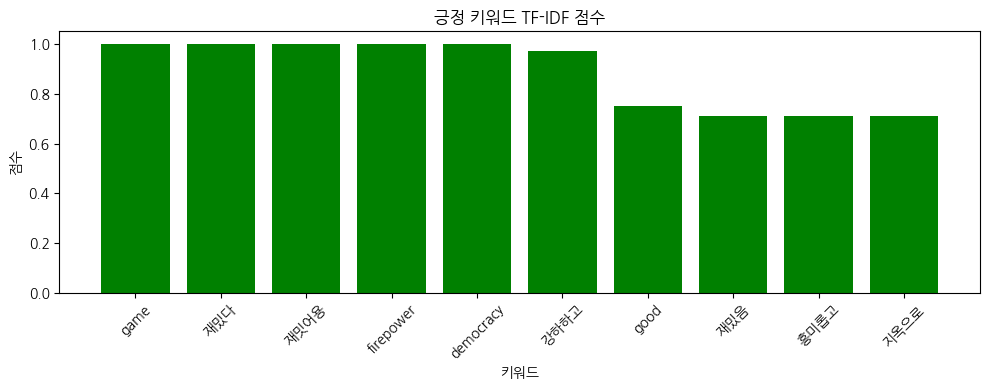

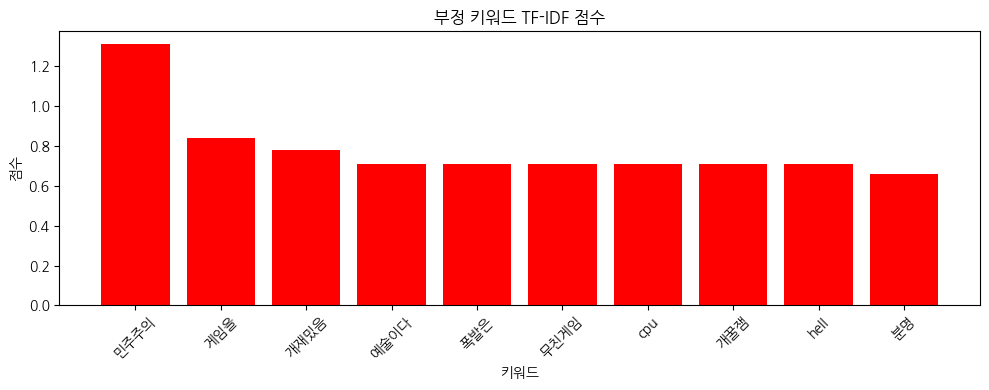

In [56]:
import koreanize_matplotlib

visualize_top_keywords(top_keywords)

In [ ]:
# review_analyzer/models.py
from django.db import models
from product.models import Product  # 연관된 게임(Product)

class ReviewAnalysis(models.Model):
    product = models.OneToOneField(Product, on_delete=models.CASCADE)
    total_reviews = models.PositiveIntegerField(default=0)
    positive_count = models.PositiveIntegerField(default=0)
    neutral_count = models.PositiveIntegerField(default=0)
    negative_count = models.PositiveIntegerField(default=0)
    average_length = models.FloatField(default=0.0)
    cluster_json = models.JSONField(null=True, blank=True)
    wordcloud_image = models.ImageField(upload_to='wordclouds/', null=True, blank=True)
    updated_at = models.DateTimeField(auto_now=True)

    def sentiment_ratio(self):
        total = self.total_reviews or 1
        return {
            "긍정": round(self.positive_count / total * 100, 1),
            "애매": round(self.neutral_count / total * 100, 1),
            "부정": round(self.negative_count / total * 100, 1)
        }

    def __str__(self):
        return f"{self.product.name} 리뷰 분석"


# review_analyzer/analysis.py
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tempfile
from django.core.files.base import ContentFile
from .models import ReviewAnalysis
from product.models import Product
from transformers import pipeline

# 감성 분석 모델 (사전학습된 모델 사용)
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def classify_review(text: str) -> str:
    label = sentiment_pipeline(text[:512])[0]['label']
    if '5' in label or '4' in label:
        return '긍정'
    elif '1' in label or '2' in label:
        return '부정'
    else:
        return '애매'


def extract_top_keywords_by_sentiment(reviews, sentiments, top_n=10):
    grouped = {'긍정': [], '부정': []}
    for r, s in zip(reviews, sentiments):
        if s in grouped:
            grouped[s].append(r)

    tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
    keywords = {}
    for sentiment, texts in grouped.items():
        if not texts:
            keywords[sentiment] = []
            continue
        X = tfidf.fit_transform(texts)
        scores = np.asarray(X.sum(axis=0)).ravel()
        indices = scores.argsort()[::-1][:top_n]
        feature_names = np.array(tfidf.get_feature_names_out())
        top_words = feature_names[indices]
        scores_sorted = scores[indices]
        keywords[sentiment] = [f"{word} ({round(score, 2)})" for word, score in zip(top_words, scores_sorted)]

    return keywords


def cluster_reviews(reviews, n_clusters=3):
    tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
    X = tfidf.fit_transform(reviews)
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X)
    clusters = {str(i): [] for i in range(n_clusters)}
    for idx, label in enumerate(labels):
        clusters[str(label)].append(reviews[idx])
    return clusters, labels


def generate_wordcloud_image(reviews, product_id):
    text = " ".join(reviews)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate(text)
    tmp = tempfile.NamedTemporaryFile(delete=False, suffix=".png")
    wordcloud.to_file(tmp.name)
    with open(tmp.name, 'rb') as f:
        return ContentFile(f.read(), name=f"wordcloud_{product_id}.png")


def analyze_and_save(product_id: int, reviews: list[str]):
    reviews = [r.strip() for r in reviews if isinstance(r, str) and len(r.strip()) >= 20]
    if not reviews:
        return None

    # 1. 감성 분류 먼저 수행
    sentiments = [classify_review(r) for r in reviews]
    counts = Counter(sentiments)

    # 2. 감성 키워드 추출
    top_keywords = extract_top_keywords_by_sentiment(reviews, sentiments)
    print("긍정 키워드:")
    for kw in top_keywords.get("긍정", []):
        print(" -", kw)
    print("부정 키워드:")
    for kw in top_keywords.get("부정", []):
        print(" -", kw)

    # 3. 클러스터링 수행
    avg_len = np.mean([len(r) for r in reviews])
    clusters, labels = cluster_reviews(reviews)

    # 4. 워드클라우드 생성
    wordcloud_img = generate_wordcloud_image(reviews, product_id)

    # 5. 결과 저장
    product = Product.objects.get(id=product_id)
    analysis, _ = ReviewAnalysis.objects.get_or_create(product=product)
    analysis.total_reviews = len(reviews)
    analysis.positive_count = counts.get("긍정", 0)
    analysis.neutral_count = counts.get("애매", 0)
    analysis.negative_count = counts.get("부정", 0)
    analysis.average_length = avg_len
    analysis.cluster_json = clusters
    analysis.wordcloud_image = wordcloud_img
    analysis.save()
    return analysis


In [3]:
from django.conf import settings

DATA_DIR = os.path.join(settings.BASE_DIR, 'preprocessor')
for fname in os.listdir(DATA_DIR) :
    if fname.endswith('.csv'):
        print(fname)

ModuleNotFoundError: No module named 'shopbot'

In [ ]:
add

ModuleNotFoundError: No module named 'shopbot'